<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%202/Regression%20Boston%20Housing/Collab%20Notebook/Perbandingan_Normalisasi_dan_Standarisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Pisahkan fitur (X) dan target (y)
X = df.drop('medv', axis=1)
y = df['medv']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi scaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Scaling data training
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_train_standard = standard_scaler.fit_transform(X_train)
X_train_robust = robust_scaler.fit_transform(X_train)

# Scaling data testing (gunakan transform, bukan fit_transform)
X_test_minmax = minmax_scaler.transform(X_test)
X_test_standard = standard_scaler.transform(X_test)
X_test_robust = robust_scaler.transform(X_test)

# Fungsi untuk melatih model dan evaluasi
def train_and_evaluate(X_train, X_test, y_train, y_test, method_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{method_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print()

# Evaluasi model dengan data yang di-scaling
train_and_evaluate(X_train_minmax, X_test_minmax, y_train, y_test, "MinMax Scaling")
train_and_evaluate(X_train_standard, X_test_standard, y_train, y_test, "Standard Scaling")
train_and_evaluate(X_train_robust, X_test_robust, y_train, y_test, "Robust Scaling")

MinMax Scaling:
  MSE: 24.2911
  R²: 0.6688

Standard Scaling:
  MSE: 24.2911
  R²: 0.6688

Robust Scaling:
  MSE: 24.2911
  R²: 0.6688



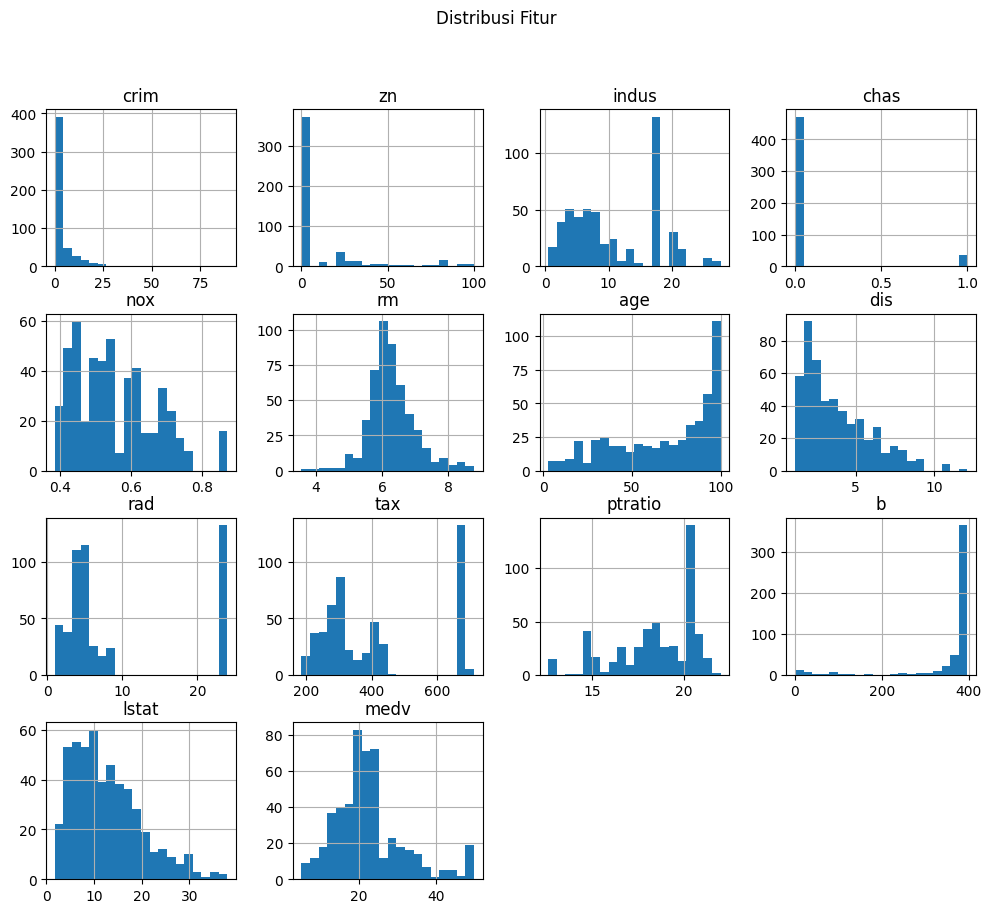

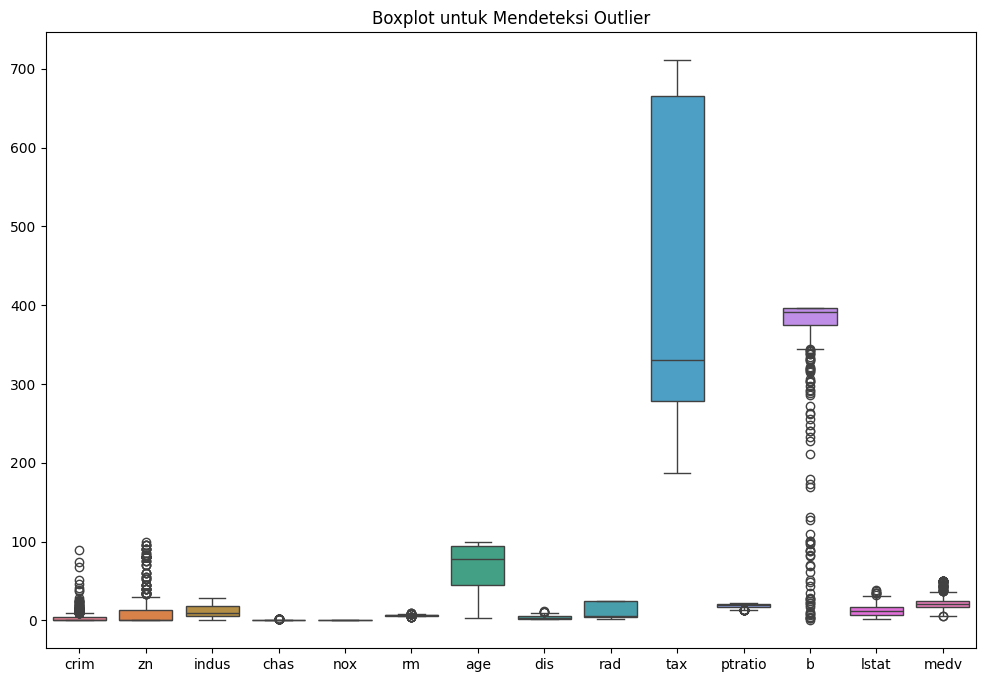

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cek distribusi fitur
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribusi Fitur")
plt.show()

# Cek outlier menggunakan boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()